In [16]:
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit

%matplotlib inline

In [17]:
def save_pkl(file_dir, data):
    f = open(file_dir,"wb")
    pickle.dump(data, f, protocol=4)
    f.close()
    
def read_pkl(file_dir):
    f = open(file_dir,"rb")
    data = pickle.load(f)
    return data

def mape_error(y_true, y_pred):
    return -np.sqrt(np.sum((y_pred - y_true) * (y_pred - y_true)) * 1.0 / y_true.shape[0])

def scoring(reg, x, y):
    pred = reg.predict(x)
    return smape(pred, y)

def smape(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / (y_true + y_pred) * 2)

def model_performance_sc_plot(predictions, labels, title):
    # Get min and max values of the predictions and labels.
    min_val = max(max(predictions), max(labels))
    max_val = min(min(predictions), min(labels))
    # Create dataframe with predicitons and labels.
    performance_df = pd.DataFrame({"Label":labels})
    performance_df["Prediction"] = predictions
    # Plot data
    sns.jointplot(y="Label", x="Prediction", data=performance_df, kind="reg")
    plt.plot([min_val, max_val], [min_val, max_val],'m--')
    plt.title(title, fontsize=9)
    plt.show()

In [18]:
# load the whole size dataset
X = np.load("London/X_m.npy")
Y_NO2 = np.load("London/Y_NO2_m.npy")
Y_PM10 = np.load("London/Y_PM10_m.npy")
Y_PM25 = np.load("London/Y_PM25_m.npy")

# PM25

In [19]:
# split the Y_PM25, X into training part and testing part
train_X_PM25, test_X_PM25, train_Y_PM25, test_Y_PM25 = train_test_split(X, Y_PM25, test_size=0.2, random_state=11)
print(train_X_PM25.shape, test_X_PM25.shape, train_Y_PM25.shape, test_Y_PM25.shape)

(730828, 198) (182708, 198) (730828,) (182708,)


In [ ]:
#X_train_sampled = X_train[:100000] x train
#Y_train_sampled = Y_train[:100000] y train

#knn_train = X_train_sampled[knn_features] x train
#knn_test = X_test[knn_features] x test

In [20]:
knn_scaler = MinMaxScaler()
knn_scaler.fit(train_X_PM25)
knn_train = knn_scaler.transform(train_X_PM25)
#knn_val = knn_scaler.transform(knn_val)
knn_test = knn_scaler.transform(test_X_PM25)


In [26]:
knn_model = KNeighborsRegressor(n_neighbors=20, leaf_size=13, n_jobs=-1)
knn_model.fit(knn_train, train_Y_PM25)

KNeighborsRegressor(algorithm='auto', leaf_size=13, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
          weights='uniform')

In [27]:
knn_train_pred = knn_model.predict(knn_train)
knn_test_pred = knn_model.predict(knn_test)

In [28]:
print('Train rmse:', np.sqrt(mean_squared_error(train_Y_PM25, knn_train_pred)))
print('test rmse:', np.sqrt(mean_squared_error(test_Y_PM25, knn_test_pred)))

Train rmse: 2.4126959325551964
test rmse: 2.56698226472121


In [35]:
print('Train sampe:', np.mean(np.abs(train_Y_PM25 - knn_train_pred) / (train_Y_PM25 + knn_train_pred) * 2))
print('test rmse:', np.mean(np.abs(test_Y_PM25 - knn_test_pred) / (test_Y_PM25 + knn_test_pred) * 2))

Train sampe: nan
test rmse: nan


/Users/yulynn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/yulynn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/yulynn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/yulynn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


/Users/yulynn/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/yulynn/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


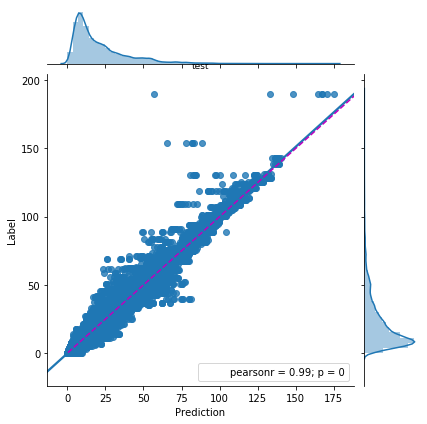

In [36]:
model_performance_sc_plot(knn_test_pred, test_Y_PM25, 'test')

In [37]:
import pickle
save_pkl("London/knn_PM25.model", knn_model)